<a href="https://colab.research.google.com/github/wkt84/emt-python/blob/master/notebook/Python07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境の再構築

In [0]:
!pip install pydicom  # pydicomのインストール
import pydicom

    100% |████████████████████████████████| 7.0MB 5.3MB/s 


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cd '/gdrive/My Drive/python/DICOMdata/'

/gdrive/My Drive/python/DICOMdata


## RT Doseファイルを読み込む

In [0]:
dose_file = pydicom.dcmread('RD.002445.Dose_Plan1.dcm')
print(dose_file)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20181113'
(0008, 0013) Instance Creation Time              TM: '103359.706000'
(0008, 0016) SOP Class UID                       UI: RT Dose Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.7.828000091838.5041.20181113103311
(0008, 0020) Study Date                          DA: '20060905'
(0008, 0030) Study Time                          TM: '142544'
(0008, 0050) Accession Number                    SH: '442542.001'
(0008, 0060) Modality                            CS: 'RTDOSE'
(0008, 0070) Manufacturer                        LO: 'Varian Medical Systems'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: 'ECS144'
(0008, 1030) Study Description                   LO: 'GUIDANCE PLACEMENT THE'
(0008, 103e) Series Description                  LO: 'Eclipse Doses'
(0008, 1090) Manufacturer's Mode

## Dose Grid Scaling を使って実際の線量に変換する

In [0]:
dose = dose_file.pixel_array * dose_file.DoseGridScaling

## 線量分布を表示する

まずは下準備でmatplotlibを使えるようにする。
グリッド線の非表示設定も行う。

In [0]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('axes', grid=False)

Axialの線量分布を表示

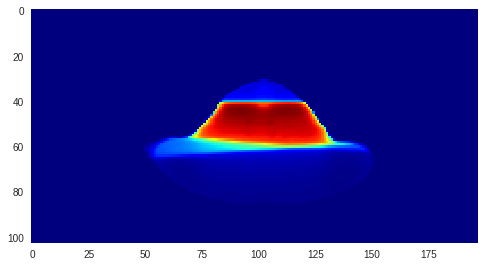

In [0]:
plt.imshow(dose[50,:,:], cmap='jet')

Coronalの線量分布を表示

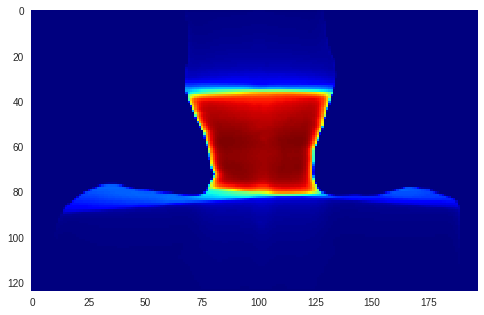

In [0]:
plt.imshow(dose[::-1,45,:], cmap='jet')

## 座標系の確認
各方向の最小値、最大値を定義

In [0]:
x_min = float(dose_file.ImagePositionPatient[0])
x_max = x_min + dose_file.Columns * dose_file.PixelSpacing[1]
y_min = float(dose_file.ImagePositionPatient[1])
y_max = y_min + dose_file.Rows * dose_file.PixelSpacing[0]
z_min = float(dose_file.ImagePositionPatient[2])
z_max = z_min + max(dose_file.GridFrameOffsetVector)

## アニメーション表示の準備

In [0]:
import numpy as np
from matplotlib import animation
from IPython.display import HTML

### Colorwashで線量分布をアニメーション表示

15秒くらい時間がかかります

In [0]:
fig, ax = plt.subplots()
plt.close()

extent = (x_min, x_max, y_max, y_min)

def update(frame):
    if frame != 0:
        ax.cla()
    ax.imshow(dose[frame,:,:], cmap='jet', extent=extent, vmin=0, vmax=50)

anim = animation.FuncAnimation(fig, update, interval=30)
HTML(anim.to_jshtml())

### Isodose lineで線量分布を表示する

In [0]:
fig, ax = plt.subplots()
plt.close()
ax.invert_yaxis()

isodoses = np.arange(0, 50, 5)

def update(frame):
    if frame != 0:
        ax.cla()
    ax.invert_yaxis()
    img = ax.contour(dose[frame,:,:], cmap='jet', levels=isodoses, origin='upper', extent=extent, vmin=0, vmax=50)
    
anim = animation.FuncAnimation(fig, update, interval=30)
HTML(anim.to_jshtml())

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
